# Imagen de Calcio en Célula Única

La técnica de imagen de calcio en célula única es una herramienta poderosa para estudiar la actividad neuronal. Permite visualizar los cambios en la concentración de calcio dentro de las células, lo que está estrechamente relacionado con la actividad eléctrica de las neuronas. En este notebook, exploraremos cómo procesar y analizar datos de imagen de calcio utilizando Python.

En concreto, partiremos de los .txt que contienen la información longitudinal ya extraida de los videos de imagen de calcio. Estos archivos contienen datos sobre la intensidad de la señal de calcio a lo largo del tiempo para cada célula. A partir de estos datos, realizaremos análisis para identificar patrones de actividad neuronal y visualizaremos los resultados.

## Características de los Datos

Los experimentos de imagen de calcio generan grandes cantidades de datos que deben ser organizados y analizados cuidadosamente.

En primer lugar, se trata de datos longitudinales, lo que significa que se han registrado múltiples puntos en el tiempo para cada célula. Esto permite observar cómo cambia la actividad neuronal a lo largo del tiempo y detectar patrones de activación. Además, en cada réplica (coverslip) se han registrado múltiples células, lo que añade una dimensión adicional a los datos.

En cuanto a la señal registrada, para cada célula, puede descomponerse en diferentes componentes: señal = tendencia + respuesta a estímulo (transitorio) + oscilaciones + ruido:

- **Tendencia**: Representa la evolución general de la señal a lo largo del tiempo, que puede ser causada por factores como la fotoblanqueo o cambios en la intensidad de la iluminación.
- **Respuesta a estímulo (transitorio)**: Son los picos de actividad que ocurren en respuesta a estímulos específicos, como la aplicación de un neurotransmisor o un cambio en el entorno de la célula.
- **Oscilaciones**: Son patrones repetitivos en la señal que pueden indicar actividad rítmica en la célula, muy común, por ejemplo, en neuronas.
- **Ruido**: Se refiere a las variaciones aleatorias en la señal que no están relacionadas con la actividad neuronal, y pueden ser causadas por factores técnicos o biológicos.



## Archivos

Para cada experimento se disponde de dos archivos:

- **Registro**: Este, en formato .txt, contiene la información longitudinal de la señal de calcio para cada una de las células (ROIS) del experimento (coverslip). En función del experimento, puede variar tanto el número de células registradas como la duración del registro, lo que se refleja en el número de filas y columnas del archivo. Además, si bien es cierto que dentro de un mismo experimento (entendiéndose como todos los registros de un mismo estudio, aunque tengan diferentes condiciones experimentales) la tasa de registro ha de ser constante, esta puede variar entre experimentos, lo que también se refleja en la estructura del archivo. 
- **Estimulos.csv**: Contiene información adicional sobre el experimento, como los estímulos aplicados (filas) y sus tiempos de aplicación (columna para el inicio y columna para el final). Esta información es crucial para interpretar correctamente los datos de la señal de calcio registrada en el archivo .txt.

En cuanto a la estructura de los directorios, habrá un directorio principal de experimentos dentro del cuál habrá subdirectorios para cada experimento, y dentro de cada subdirectorio se encontrarán los archivos correspondientes al registro y a los estímulos. Por ello, para acceder a los datos de un experimento específico, se deberá navegar a través de la estructura de directorios hasta llegar al subdirectorio correspondiente y luego abrir los archivos .txt y .csv para obtener la información necesaria para el análisis.

## Análisis de Datos

El análisis de los datos de imagen de calcio en célula única implica varios pasos, desde la preprocesamiento de los datos hasta la identificación de patrones de actividad neuronal. A continuación, se describen algunos de los análisis que se pueden realizar:

1. **Preprocesamiento**: Esto incluye la normalización de los datos, la eliminación de tendencias y la reducción del ruido. Es importante asegurarse de que los datos estén limpios y listos para el análisis posterior.

    Para evitar que el estímulo aplicado a la célula afecte a la tendencia, se puede realizar un análisis de regresión lineal utilizando solo los datos previos o los previos y posteriores al estímulo. Esto permitirá obtener una estimación de la tendencia sin la influencia del estímulo, lo que es crucial para interpretar correctamente la respuesta de la célula.

    Además, es importante tener en cuenta que la señal de calcio puede contener oscilaciones que no están relacionadas con la actividad neuronal, por lo que es necesario aplicar técnicas de filtrado para eliminar estas oscilaciones y centrarse en la respuesta a estímulos. En este sentido, se pueden utilizar filtros de paso bajo para eliminar las oscilaciones de alta frecuencia y resaltar la respuesta a estímulos.

    No obstante, también es importante considerar que las oscilaciones pueden ser una parte importante de la actividad neuronal, por lo que es necesario analizar cuidadosamente los datos para determinar si las oscilaciones son relevantes para la interpretación de los resultados.

2. **Identificación de Picos**: Se pueden identificar los picos de actividad que corresponden a respuestas a estímulos específicos. Esto se puede hacer utilizando técnicas de detección de picos, como el método de umbral o el método de derivada.

    De cada uno de los picos interesa obtener información sobre su altura, su duración, de su área bajo la curva y de la pendiente de la curva al inicio del pico o alrededor del punto de inflexión. Esta información puede ser útil para comparar la respuesta de diferentes células a los mismos estímulos o para comparar la respuesta de una misma célula a diferentes estímulos.

    Por ello, para obtener tanto el área como el máximo, se tratará de eliminar previamente la tendencia de la señal, las oscilaciones y el valor de la señal antes del estímulo, para asegurarnos de que estamos midiendo únicamente la respuesta a estímulos. Es decir, se establece, para cada ROI/Estímulo, el *baseline* como el valor de la señal antes del estímulo, y se resta este valor a la señal para obtener una medida de la respuesta a estímulos que no esté influenciada por la tendencia o las oscilaciones.

    Aunque no se muestra, cabe destacar que se ha tratado de eliminar la tendencia de forma general, a lo largo de todo el registro, pero no ha sido una buena opción ya que, en ocasiones, los registros empiezan con un basal alto y va bajando y luego se estabiliza, lo que hace, por un lado, que haya una tendencia falsa y, por otro lado, que la respuesta a estímulos se vea afectada por esta tendencia. Por ello, se ha optado por eliminar la tendencia de forma local, utilizando únicamente los datos previos o los previos y posteriores al estímulo, lo que permite obtener una estimación de la tendencia sin la influencia del estímulo.

3. **Análisis de Oscilaciones**: Si las oscilaciones son relevantes para la interpretación de los resultados, se pueden analizar utilizando técnicas de análisis de frecuencia, como la transformada de Fourier o el análisis de wavelets. Esto permitirá identificar las frecuencias dominantes en la señal y determinar si están relacionadas con la actividad neuronal.

4. **Comparación entre Células**: Se pueden comparar las respuestas de diferentes células a los mismos estímulos para identificar patrones de actividad neuronal. Esto se puede hacer utilizando técnicas de análisis estadístico, como el análisis de varianza (ANOVA) o el análisis de componentes principales (PCA).

5. **Visualización de Resultados**: Es importante visualizar los resultados de manera clara y comprensible. Se pueden utilizar gráficos de líneas para mostrar la evolución de la señal de calcio a lo largo del tiempo, gráficos de barras para comparar la respuesta de diferentes células a los mismos estímulos, o gráficos de dispersión para mostrar la relación entre diferentes variables.

## Importar Librerías

In [27]:
! pip install numpy pandas matplotlib scipy math

In [28]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.signal as signal
from scipy.integrate import trapezoid
import math


In [29]:
# Ver qué carpetas hay en el directorio Experimentos
base_dir = '../../Experimentos'
carpetas = os.listdir(base_dir)
# Eliminar archivos que no sean carpetas
carpetas = [carpeta for carpeta in carpetas if os.path.isdir(os.path.join(base_dir, carpeta))]
print(f"En total, hay {len(carpetas)} carpetas en el directorio Experimentos.")

En total, hay 93 carpetas en el directorio Experimentos.


## Obtener archivos de interés

Los archivos de interés se encuentran en el directorio `Experimentos/`, que contiene subdirectorios para cada experimento. Dentro de cada subdirectorio, se encuentran los archivos .txt con la información longitudinal de la señal de calcio y los archivos .csv con la información sobre los estímulos aplicados. Para acceder a estos archivos, se puede utilizar la biblioteca `os` de Python para navegar por la estructura de directorios y la biblioteca `pandas` para leer los archivos .txt y .csv. A continuación, se muestra un ejemplo de cómo obtener los archivos de interés para un experimento específico:

In [30]:
# Leer txt y csv dentro de cada subcarpeta de Experimentos
for i, carpeta in enumerate(carpetas):
    carpeta_path = os.path.join(base_dir, carpeta)
    print(carpeta_path)
    if os.path.isdir(carpeta_path):
        archivos = os.listdir(carpeta_path)
        print(f"Carpeta {i+1}: {carpeta}")

../../Experimentos\ID002_A_001
Carpeta 1: ID002_A_001
../../Experimentos\ID002_A_002
Carpeta 2: ID002_A_002
../../Experimentos\ID002_A_003
Carpeta 3: ID002_A_003
../../Experimentos\ID002_A_004
Carpeta 4: ID002_A_004
../../Experimentos\ID002_B_001
Carpeta 5: ID002_B_001
../../Experimentos\ID002_B_002
Carpeta 6: ID002_B_002
../../Experimentos\ID002_B_003
Carpeta 7: ID002_B_003
../../Experimentos\ID002_B_004
Carpeta 8: ID002_B_004
../../Experimentos\ID002_B_005
Carpeta 9: ID002_B_005
../../Experimentos\ID002_B_006
Carpeta 10: ID002_B_006
../../Experimentos\ID002_C_001
Carpeta 11: ID002_C_001
../../Experimentos\ID002_C_002
Carpeta 12: ID002_C_002
../../Experimentos\ID002_C_003
Carpeta 13: ID002_C_003
../../Experimentos\ID002_C_004
Carpeta 14: ID002_C_004
../../Experimentos\ID002_C_005
Carpeta 15: ID002_C_005
../../Experimentos\ID002_C_006
Carpeta 16: ID002_C_006
../../Experimentos\ID003_A_001
Carpeta 17: ID003_A_001
../../Experimentos\ID003_A_002
Carpeta 18: ID003_A_002
../../Experimentos\

## Lectura de los archivos

Para leer los archivos .txt y .csv, se puede utilizar la función `read_csv` de la biblioteca `pandas`. A continuación, se muestra un ejemplo de cómo leer ambos tipos de archivos:

In [31]:
######################################################################################
##################### Registro (.txt) y Estimulos (.csv) ##########################
###################################################################################### 

exper = 1 # Solo para la primera carpeta, puedes iterar sobre todas si quieres
# 1.1. Listar los archivos dentro de la primera carpeta
archivos = os.listdir(os.path.join(base_dir, carpetas[exper]))
txt_files = [archivo for archivo in archivos if archivo.endswith('.txt')]
csv_files = [archivo for archivo in archivos if archivo.endswith('.csv')]
print(f"Archivos .txt encontrados: {txt_files}")
print(f"Archivos .csv encontrados: {csv_files}")

# 1.2. Leer el archivo .txt (Registro)
if txt_files: # Evaluar si se encontró un archivo .txt
    # Leer el primer archivo .txt encontrado
    txt_file_path = os.path.join(base_dir, carpetas[exper], txt_files[0])
    data = pd.read_csv(txt_file_path, sep='\t', skiprows=3, header=1)  # Ajusta el separador si es necesario
    data.columns = ['Time'] + [f'ROI_{i}' for i in range(1, len(data.columns))]  # Ajusta los nombres de las columnas según tu archivo
    data.iloc[:, 0] = data.iloc[:, 0] / (1000 * 60)  # Convertir tiempo de ms a minutos
    print(f"Datos del archivo {txt_files[0]}:")
    print(data.head())

# 1.3. Leer el archivo .csv (Estimulos)
if csv_files:
    csv_file_path = os.path.join(base_dir, carpetas[exper], csv_files[0])
    data_csv = pd.read_csv(csv_file_path, sep=';', decimal=',')  # Ajusta el separador si es necesario
    # Seleccionar la primera columna y cambiar los valores a minúsculas
    data_csv.iloc[:, 0] = data_csv.iloc[:, 0].str.upper()
    print(f"Datos del archivo {csv_files[0]}:")
    print(data_csv.head())

Archivos .txt encontrados: ['ID002_A_002.txt']
Archivos .csv encontrados: ['estimulos.csv']
Datos del archivo ID002_A_002.txt:
       Time   ROI_1   ROI_2   ROI_3   ROI_4   ROI_5   ROI_6   ROI_7   ROI_8  \
0  0.000000  0.2439  0.1969  0.2452  0.1923  0.1283  0.2342  0.1851  0.1136   
1  0.084925  0.2486  0.1922  0.2390  0.1964  0.1328  0.2389  0.1826  0.1229   
2  0.169850  0.2461  0.1921  0.2401  0.1953  0.1308  0.2368  0.1817  0.1173   
3  0.254775  0.2469  0.1954  0.2461  0.1969  0.1302  0.2358  0.1839  0.1176   
4  0.339700  0.2407  0.1935  0.2460  0.1912  0.1266  0.2337  0.1855  0.1134   

    ROI_9  ROI_10  
0  0.1492  0.2235  
1  0.1641  0.2203  
2  0.1641  0.2187  
3  0.1618  0.2188  
4  0.1539  0.2169  
Datos del archivo estimulos.csv:
  Unnamed: 0  inicio  fin
0  DEPOSITOS       3   20
1       SOCE      20   23


## Estíumulos

Para analizar la respuesta de las células a los estímulos aplicados, es útil crear una máscara que indique cuándo se aplicaron los diferentes estímulos. Esto se puede hacer de diferentes formas:

1. Utilizando la información contenida en el archivo .csv de estímulos, que incluye los tiempos de inicio y fin de cada estímulo. A partir de esta información, se puede crear una máscara binaria para cada estímulo, donde el valor es 1 durante el período en que se aplica el estímulo y 0 en caso contrario. Esto permitirá identificar fácilmente los períodos de tiempo en los que se aplicaron los estímulos y analizar la respuesta de las células durante esos períodos.
2. Mediante una función que detecte automáticamente los picos de actividad en la señal de calcio y los asocie con los estímulos aplicados. Esto se puede hacer utilizando técnicas de detección de picos:
    - Método de derivada, para identificar los picos de actividad que corresponden a respuestas a estímulos específicos. En concreto, se puede calcular la derivada de la señal de calcio y buscar los puntos donde la derivada cambia de signo, lo que indica un cambio en la dirección de la señal. Esto puede ser útil para identificar picos de actividad que no son tan evidentes o que están superpuestos con otras señales. Además, se pueden aplicar técnicas de suavizado a la señal de calcio antes de calcular la derivada para reducir el ruido y mejorar la detección de picos. Esto es, en realidad, el análisis de la pendiente, pero utilizando la derivada de la señal de calcio para identificar los puntos donde la pendiente cambia significativamente, lo que puede indicar la presencia de un pico de actividad.
    - Método de análisis de la pendiente, para identificar los picos de actividad que corresponden a respuestas a estímulos específicos. Esto se puede hacer analizando la pendiente de la señal de calcio en diferentes puntos del tiempo y detectando los puntos en los que la pendiente cambia significativamente, lo que puede indicar la presencia de un pico de actividad. Este método puede ser útil para detectar picos de actividad que no son tan evidentes o que están superpuestos con otras señales, ya que se enfoca en los cambios en la pendiente de la señal en lugar de en la amplitud de la señal.
    - Método de umbral. Este método consiste en establecer un umbral de detección para identificar los picos de actividad que corresponden a respuestas a estímulos específicos. El umbral se puede establecer en función de la media y la desviación estándar de la señal de calcio, o utilizando técnicas más avanzadas como el análisis de la distribución de la señal para determinar un umbral óptimo. Este método puede ser útil para detectar picos de actividad que son claramente evidentes en la señal de calcio, pero puede ser menos efectivo para detectar picos que están superpuestos con otras señales o que no son tan evidentes. Por ello, se pueden aplicar técnicas de suavizado a la señal de calcio antes de aplicar el método de umbral para reducir el ruido y mejorar la detección de picos. Además, se pueden utilizar técnicas de detección de picos que sean menos sensibles al ruido y a las oscilaciones en la señal de calcio, como el método de análisis de la pendiente o el método de derivada, para complementar el método de umbral y mejorar la detección de picos de actividad que son realmente relevantes para la interpretación de los resultados.
    - Método del umbral adaptativo, que ajusta el umbral de detección en función de la señal de fondo y la variabilidad de la señal de calcio. Esto puede ser útil para detectar picos de actividad que no son tan evidentes o que están superpuestos con otras señales. Además, puede enfocarse desde un punto de vista robusto, utilizando técnicas de detección de picos que sean menos sensibles al ruido y a las oscilaciones en la señal de calcio. Esto puede ayudar a identificar picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido o las oscilaciones.

3. Además, también puede ser interesante eliminar el ruido de la señal de calcio antes de aplicar cualquiera de los métodos anteriores para mejorar la detección de picos de actividad. Esto se puede hacer utilizando:
    - Técnicas de filtrado, como el filtro de media móvil o el filtro de Savitzky-Golay, para suavizar la señal y reducir el ruido. Esto puede ayudar a identificar picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido.
    - Análisis frecuencial, para identificar las frecuencias debidas al ruido y eliminarlas de la señal de calcio. Esto puede ser útil para mejorar la detección de picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido. Para ello, se pueden utilizar técnicas de análisis de frecuencia, como la transformada de Fourier o el análisis de wavelets, para identificar las frecuencias dominantes en la señal de calcio y determinar si están relacionadas con la actividad neuronal. Esto puede ayudar a identificar patrones de actividad que no son evidentes en el dominio del tiempo, pero que pueden ser relevantes para la interpretación de los resultados. 
    
        Además, también puede ser útil analizar las frecuencias dominantes en la señal de calcio y determinar si están relacionadas con la actividad neuronal. Esto puede ser útil para detectar patrones de actividad que no son evidentes en el dominio del tiempo, pero que pueden ser relevantes para la interpretación de los resultados. Para ello, se pueden utilizar técnicas de análisis de frecuencia, como la transformada de Fourier o el análisis de wavelets, para identificar las frecuencias dominantes en la señal de calcio y determinar si están relacionadas con la actividad neuronal. Esto puede ayudar a identificar patrones de actividad que no son evidentes en el dominio del tiempo, pero que pueden ser relevantes para la interpretación de los resultados.

Así, mediante los métodos anteriores, es posible crear una máscara binaria para cada estímulo, donde el valor es 1 durante el período en que se detecta un pico de actividad asociado con ese estímulo y 0 en caso contrario. Además, para rizar el rizo, podría identificarse no solo los picos correspondientes a los diferentes estímulos, sino también, dentro de cada estímulo, la zona del pico correspondiente a la subida, a la meseta y a la caída.

### Máscara de estímulos en base al .csv de estímulos

En este caso, se puede crear una máscara binaria para cada estímulo utilizando la información contenida en el archivo .csv de estímulos, que incluye los tiempos de inicio y fin de cada estímulo. A partir de esta información, se puede crear una máscara binaria para cada estímulo, donde el valor es 1 durante el período en que se aplica el estímulo y 0 en caso contrario. Esto permitirá identificar fácilmente los períodos de tiempo en los que se aplicaron los estímulos y analizar la respuesta de las células durante esos períodos.

El probelma aquí es que se toma, para todos los ROIs, el mismo período de tiempo para cada estímulo, lo que puede no ser del todo correcto debido a las siguientes situaciones:
- La respuesta a estímulos puede variar entre células, lo que no quedaría reflejado.
- A pesar de que un estímulo se aplique durante un periodo de tiempo determinado, la respuesta de la célula puede no coincidir exactamente con ese período, ya que puede haber un retraso en la respuesta o la respuesta puede durar más tiempo que el estímulo aplicado. Esto puede llevar a que se incluyan períodos de tiempo en la máscara que no corresponden a la respuesta real de la célula al estímulo, lo que puede afectar la interpretación de los resultados. Esto podría solventarse, al menos de cara a identificar el final del estímulo, tomar como valor final el inicio del siguiente estímulo o, en caso de tratarse del último estímulo, el final del registro. 

Por ello, es importante tener en cuenta que esta máscara puede no ser completamente precisa para todas las células, y se deben interpretar los resultados con cautela.

In [32]:
######################################################################################
##################### 2. Preparar tiempo y Máscara de estímulos ######################
######################################################################################
estimulos = data_csv.iloc[:, 0].unique()        # Obtener los estímulos únicos
mascaras_estimulos = {}                         # Diccionario para almacenar las máscaras individuales de cada estímulo
mascara_total = np.ones(len(data))              # Crear una máscara de unos del mismo tamaño que el DataFrame de datos
                                                # para almacenar la máscara total: 1s cuando no hay estímulo, 0s cuando sí.

# Iterar sobre cada fila del DataFrame de estímulos para crear las máscaras individuales y la máscara total
for index, row in data_csv.iterrows():
    
    # Inicio y final del intervalo del estímulo               
    start_time = row['inicio']                  
    end_time = row['fin']    

    # Crear una máscara por estímulo de unos del mismo tamaño que el DataFrame de datos
    mascara = np.ones(len(data))
    mascara[(data['Time'] >= start_time) & (data['Time'] <= end_time)] = 0
    
    # Almacenar la máscara individual para cada estímulo y multiplicar para obtener la máscara total             
    estimulo = row.iloc[0]                       # Nombre del estímulo
    mascaras_estimulos[estimulo] = mascara       # Guardar la máscara individual para cada estímulo

    # Máscara total: 1s cuando no hay estímulo, 0s cuando sí. Multiplicar la máscara total por la máscara individual de cada estímulo
    mascara_total *= mascara

Máscaras individuales por estímulo:


C:\Users\Enrique\AppData\Local\Temp\ipykernel_11592\608119213.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


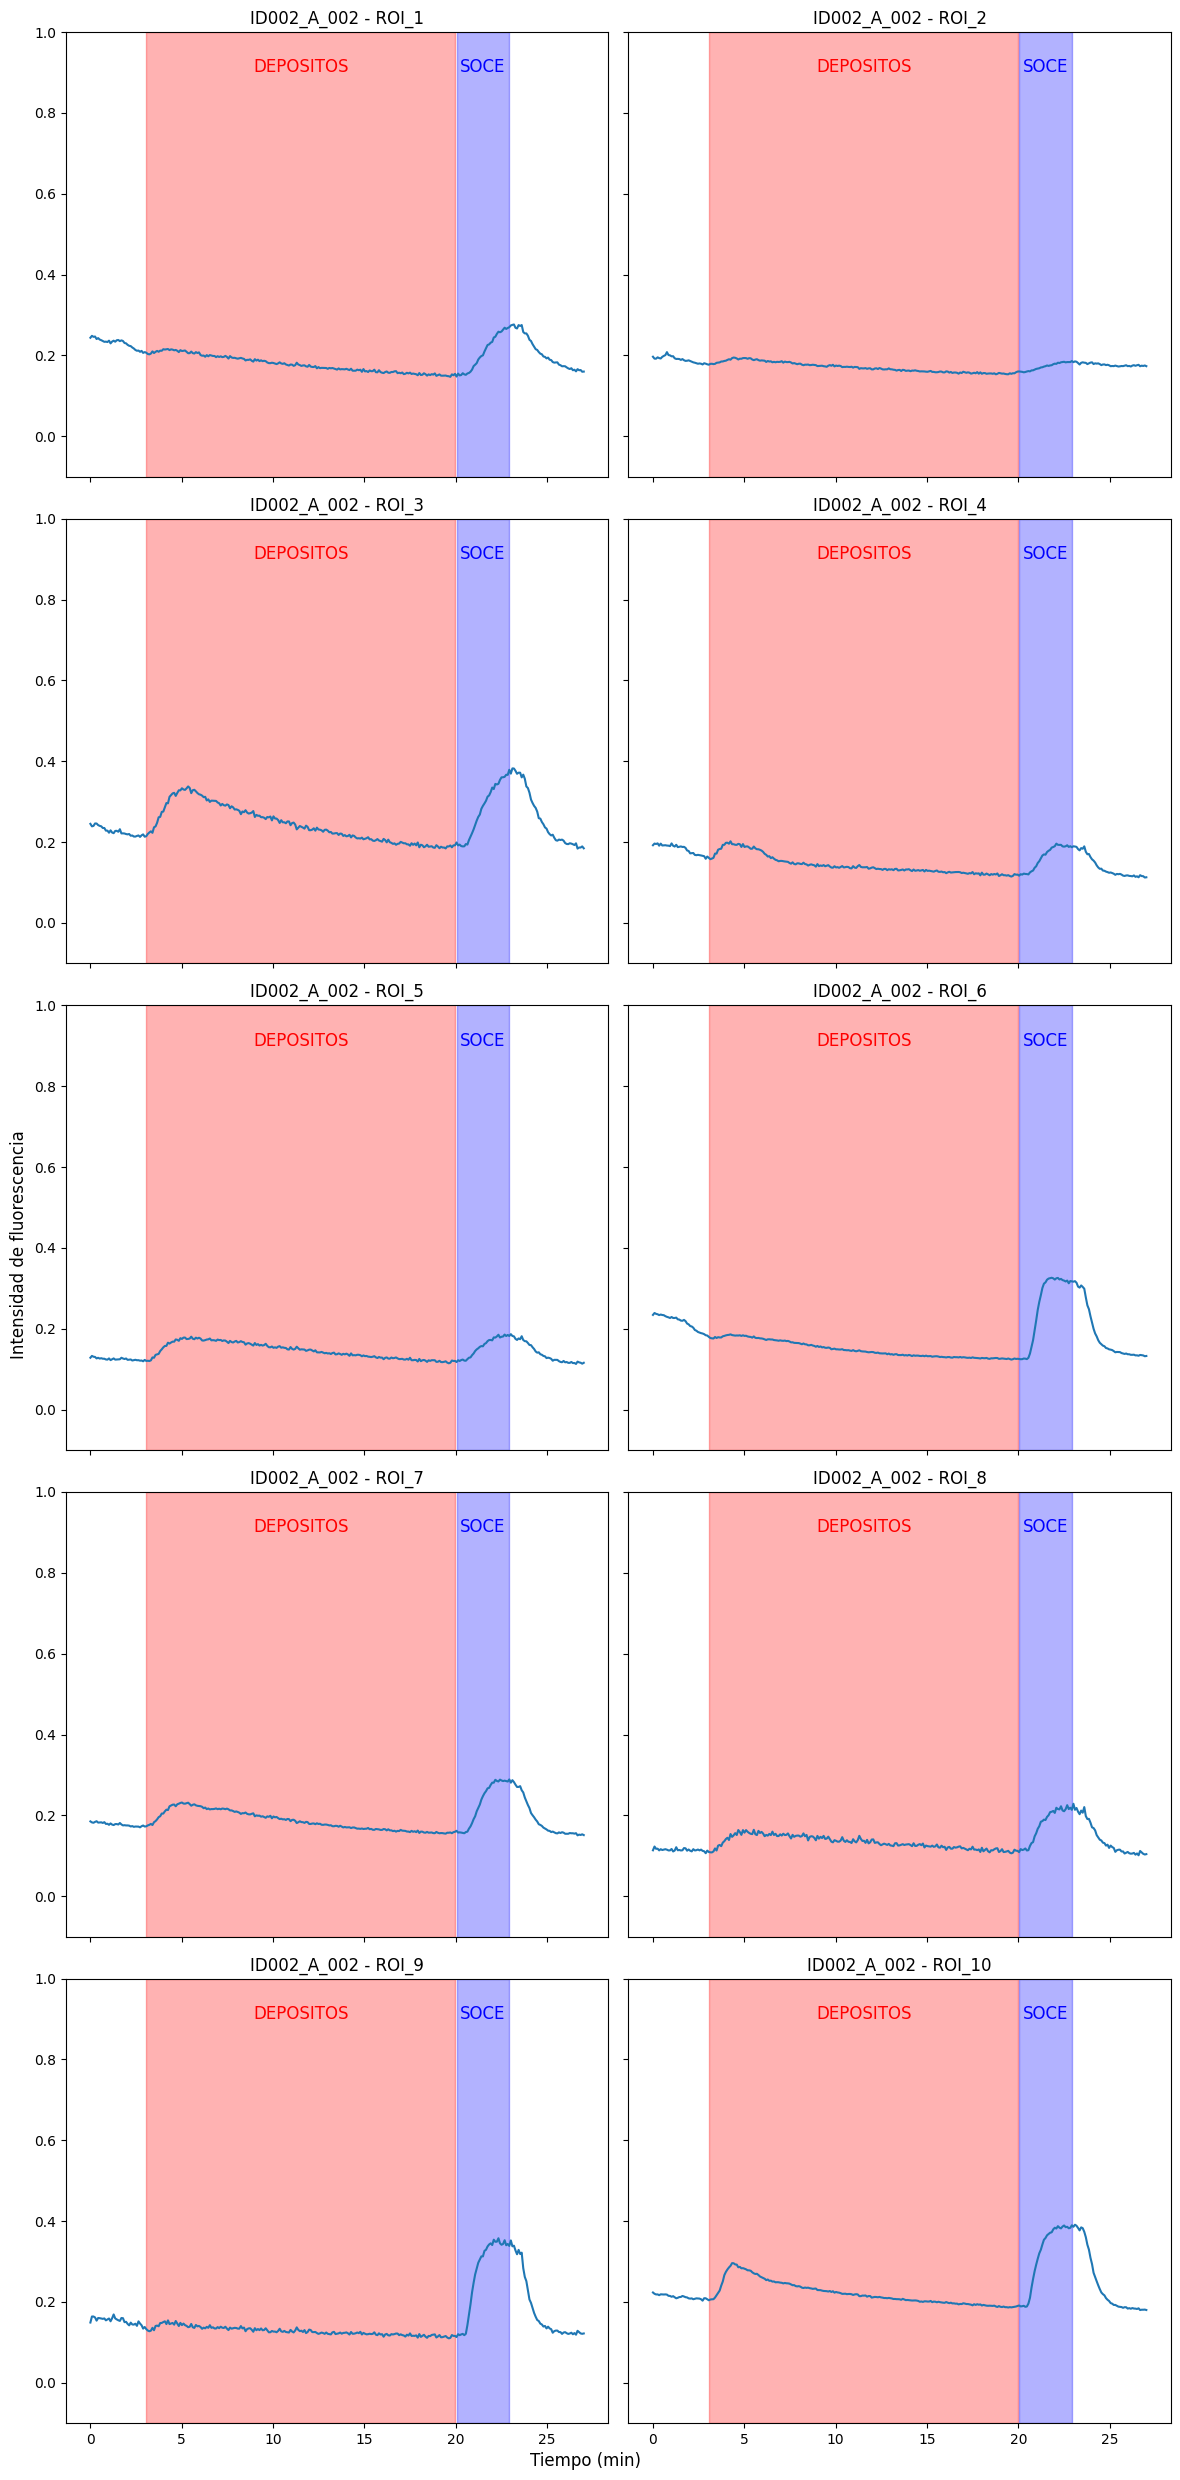

In [33]:
# Imprimir las máscaras individuales y la máscara total
print("Máscaras individuales por estímulo:")
t = data.iloc[:, 0].to_numpy()                          # Convertir la columna de tiempo a un array de numpy

# Crear un gráfico con subgráficos para cada roi
fig, axes = plt.subplots(
    math.ceil((len(data.columns) - 1) / 2), 
    2, 
    figsize=(12, 5 * math.ceil((len(data.columns) - 1) / 2)), 
    sharex=True,
    sharey=True
    )

# Iterar sobre las columnas de ROI (omitiendo la columna de tiempo)
for idx, column in enumerate(data.columns[1:]):                     
    x = data[column].to_numpy()                         # Convertir la columna de datos a un array de numpy

    # Crear un gráfico 
    # plt.figure(figsize=(12, 5))                        # Crear una figura con un tamaño específico
    ax = axes[idx // 2, idx % 2]
    ax.plot(t, x, label='Original')                    # Graficar la señal original
    ax.set_ylim(-0.1, 1)                                   # Establecer límites para el eje y
    ax.set_title(f'{carpetas[exper]} - {column}')                     # Título del gráfico
    # ax.set_xlabel('Tiempo (min)')                          # Etiqueta del eje x


    # Añadir mascara total al gráfico original
    colores = ['red', 'blue', 'green', 'orange', 'purple']  # Colores para cada estímulo
    for i, estimulo in enumerate(estimulos):
        mascara = mascaras_estimulos[estimulo]
        ax.fill_between(
            t, 
            ax.get_ylim()[0], 
            ax.get_ylim()[1], 
            where=(mascara == 0), 
            color=colores[i % len(colores)], 
            alpha=0.3
            )
        # Añadir texto del estímulo en el gráfico
        ax.text(
            t[mascara == 0][len(t[mascara == 0]) // 2],  # Posición del texto en el centro del intervalo del estímulo
            ax.get_ylim()[1] * 0.9,                   # Posición del texto en el 90% del límite superior del eje y
            estimulo, 
            color=colores[i % len(colores)], 
            fontsize=12, 
            ha='center'
        )

#fig.suptitle(f'{carpetas[exper]} - Respuesta de las células a los estímulos', fontsize=16)  # Título general para todos los subgráficos
fig.supxlabel('Tiempo (min)')  # Etiqueta del eje x para todos los subgráficos
fig.supylabel('Intensidad de fluorescencia')  # Etiqueta del eje y para todos los subgráficos
fig.tight_layout()
fig.show()

### Suavizado de la señal de calcio

El suavizado de la señal de calcio es un paso importante en el análisis de los datos de imagen de calcio, ya que puede ayudar a reducir el ruido y mejorar la detección de picos de actividad. Existen varias técnicas de suavizado que se pueden aplicar a la señal de calcio, como el filtro de media móvil o el filtro de Savitzky-Golay.

- El filtro de media móvil consiste en calcular la media de un número determinado de puntos adyacentes en la señal de calcio para suavizarla. Esto puede ayudar a reducir el ruido y mejorar la detección de picos de actividad, pero también puede suavizar los picos de actividad y hacer que sean menos evidentes.
- El filtro de Savitzky-Golay es una técnica de suavizado que utiliza un polinomio para ajustar la señal de calcio en un número determinado de puntos adyacentes. Esto puede ayudar a reducir el ruido y mejorar la detección de picos de actividad, pero también puede suavizar los picos de actividad y hacer que sean menos evidentes.

C:\Users\Enrique\AppData\Local\Temp\ipykernel_11592\670528282.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


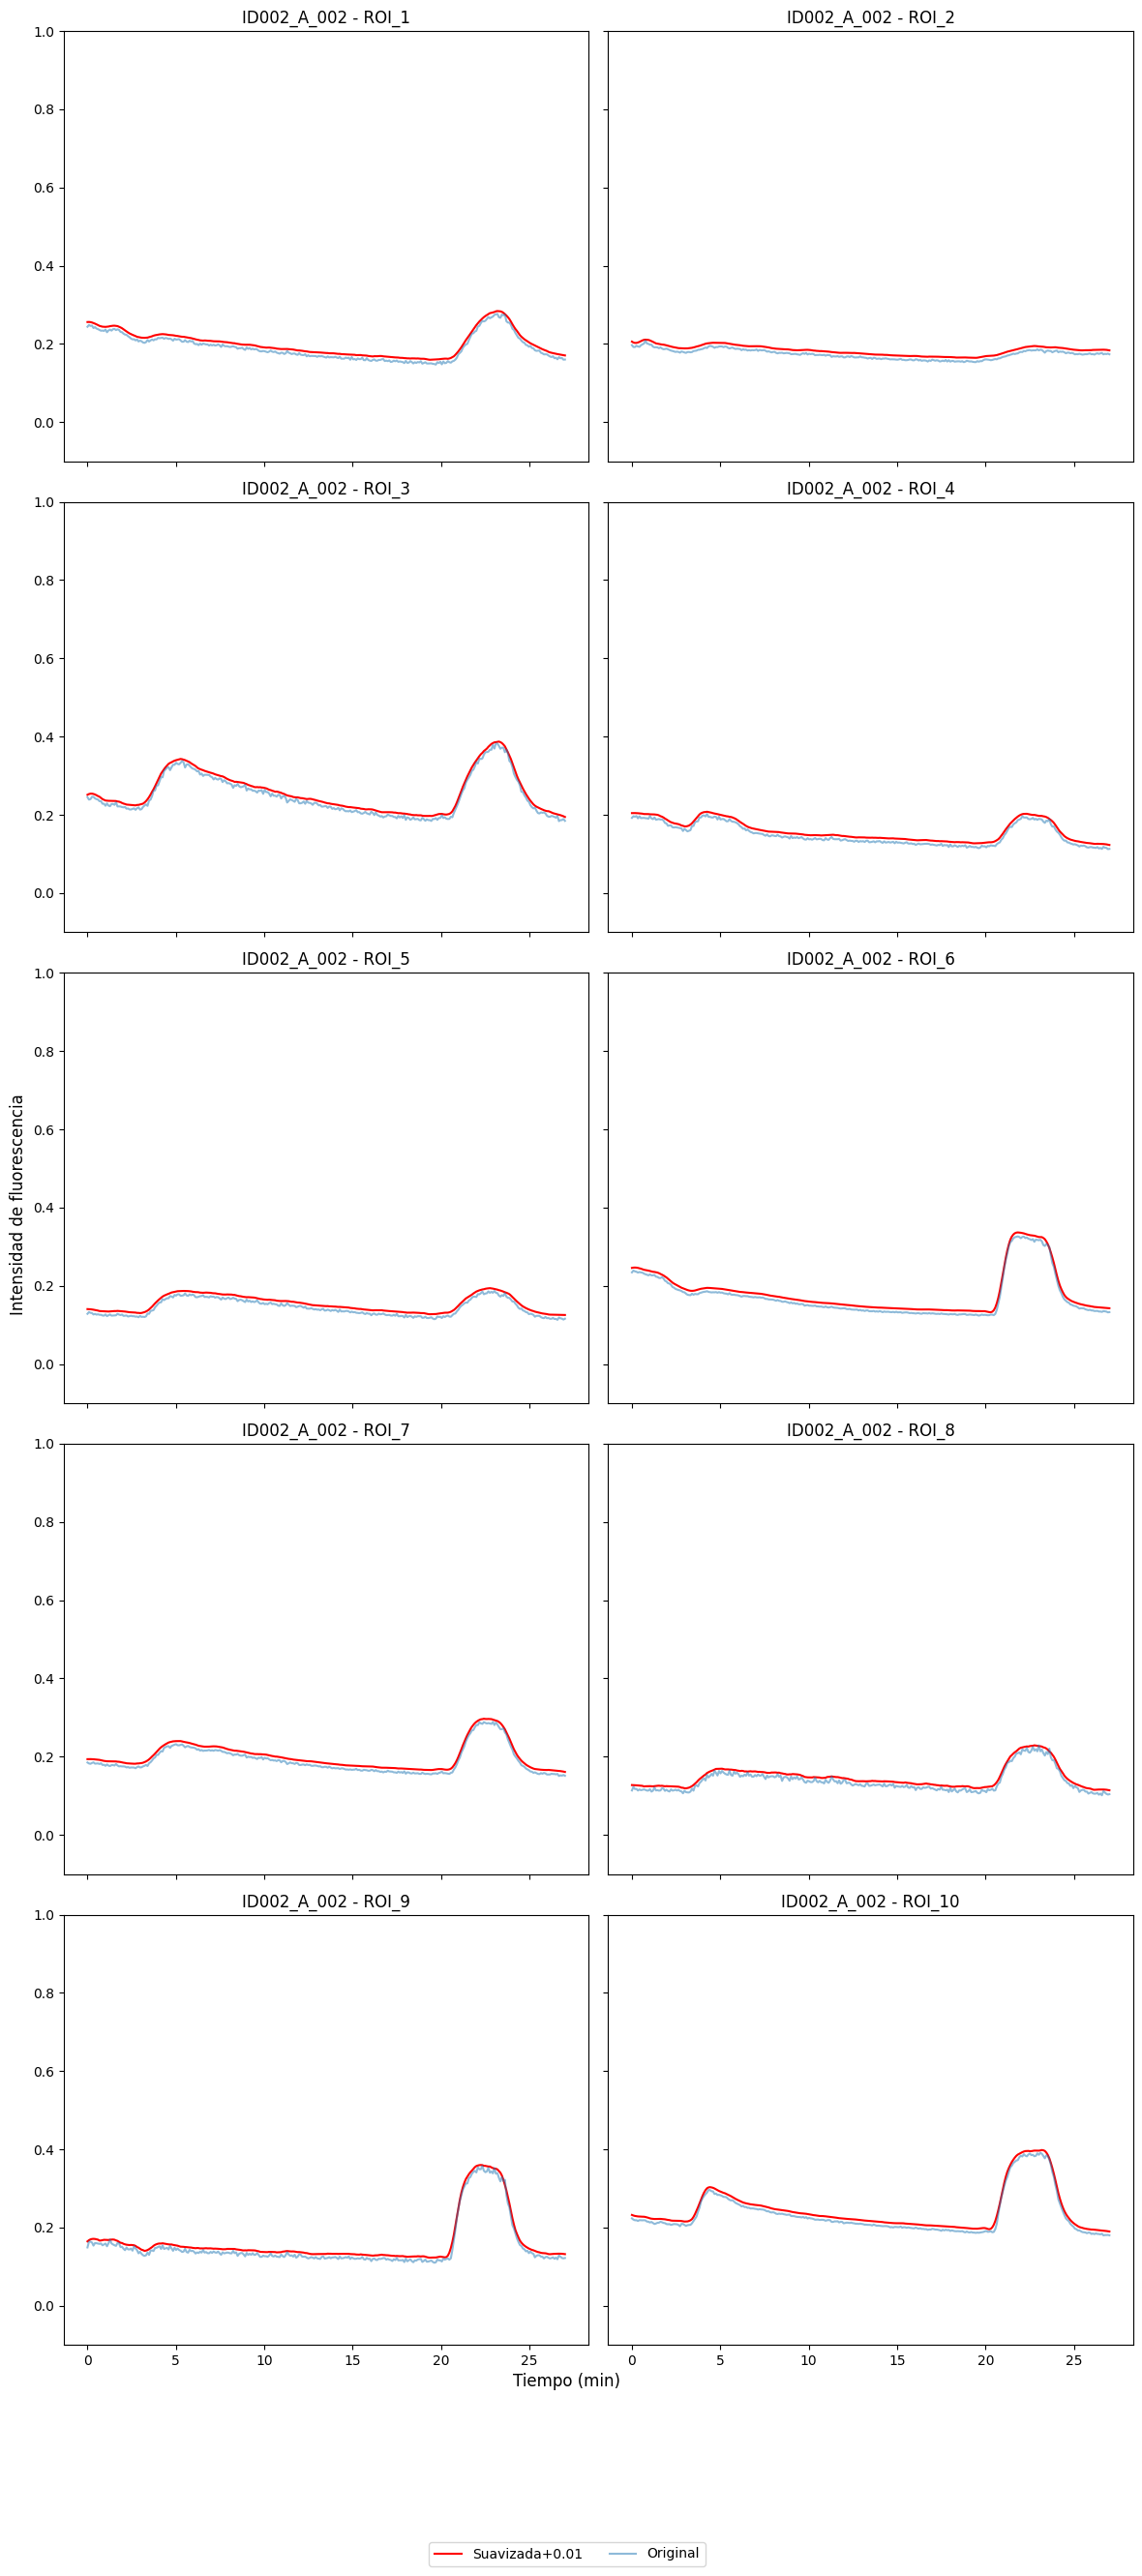

In [34]:
# Crear una copia del DataFrame original para almacenar los datos suavizados
data_sg = data.copy()  

# Parámetros del filtro de Savitzky-Golay
ventana = 15  # Tamaño de la ventana (debe ser un número impar)
orden = 3     # Orden del polinomio a ajustar

# Gráfico con subgráficos para cada roi
fig, axes = plt.subplots(
    math.ceil((len(data.columns) - 1) / 2), 
    2, 
    figsize=(12, 5 * math.ceil((len(data.columns) - 1) / 2)), 
    sharex=True,
    sharey=True
    )

# Iterar sobre las columnas de ROI (omitiendo la columna de tiempo)
for idx, column in enumerate(data.columns[1:]):  
    x = data[column].to_numpy()  # Convertir la columna de datos a un array de numpy
    # Aplicar el filtro de Savitzky-Golay para suavizar la señal
    data_sg[column] = signal.savgol_filter(x, window_length=ventana, polyorder=orden)  # Ajusta los parámetros según tus necesidades

    # Graficar la señal original y suavizada para cada ROI
    ax = axes[idx // 2, idx % 2]
    ax.plot(t, data_sg[column] + 0.01, label='Suavizada+0.01', color='red', alpha=1)  # Graficar la señal suavizada en rojo
    ax.plot(t, x, label='Original', alpha=0.5)  # Graficar la señal original con menor opacidad
    
    ax.set_ylim(-0.1, 1)  # Establecer límites para el eje y
    ax.set_title(f'{carpetas[exper]} - {column}')  # Título del gráfico
    # ax.set_xlabel('Tiempo (min)')  # Etiqueta del eje x
    
fig.supxlabel('Tiempo (min)')  # Etiqueta del eje x para todos los subgráficos
fig.supylabel('Intensidad de fluorescencia')  # Etiqueta del eje y para todos los subgráficos
# Añadir leyenda fuera del gráfico (solo de las dos primeras líneas para evitar saturar el gráfico)
fig.legend(['Suavizada+0.01', 'Original'], 
           loc='upper center', 
           bbox_to_anchor=(0.5, -0.05), # Ajusta la posición de la leyenda según sea necesario
           fancybox=True, 
           ncol=2
           )

fig.tight_layout()
fig.show()

### Crecimiento/Decrecimiento de la señal de calcio

El crecimiento o decrecimiento de la señal de calcio se refiere a la tasa de cambio de la señal de calcio a lo largo del tiempo. Esto puede ser útil para identificar patrones de actividad neuronal, como la respuesta a estímulos o la presencia de oscilaciones. Para analizar el crecimiento o decrecimiento de la señal de calcio, se pueden utilizar técnicas de análisis de la pendiente, como el método de análisis de la pendiente o el método de derivada, para identificar los puntos en los que la pendiente cambia significativamente, lo que puede indicar la presencia de un pico de actividad. Esto puede ser útil para detectar picos de actividad que no son tan evidentes o que están superpuestos con otras señales, ya que se enfoca en los cambios en la pendiente de la señal en lugar de en la amplitud de la señal.

Al tratarse de una señal discreta, el análisis de la pendiente y el de la derivada se pueden realizar utilizando técnicas de diferenciación numérica, como el método de diferencias finitas. Esto implica calcular la diferencia entre los valores de la señal de calcio en puntos adyacentes para obtener una estimación de la pendiente o la derivada en cada punto del tiempo. Luego, se pueden identificar los puntos donde la pendiente o la derivada cambia significativamente para detectar los picos de actividad.

- Método de la pendiente, para identificar los picos de actividad que corresponden a respuestas a estímulos específicos. Esto se puede hacer analizando la pendiente de la señal de calcio en diferentes puntos del tiempo y detectando los puntos en los que la pendiente cambia significativamente, lo que puede indicar la presencia de un pico de actividad. Este método puede ser útil para detectar picos de actividad que no son tan evidentes o que están superpuestos con otras señales, ya que se enfoca en los cambios en la pendiente de la señal en lugar de en la amplitud de la señal. En cuanto a si ha de hacerse o no sobre la señal de calcio suavizada, esto dependerá de la cantidad de ruido presente en la señal original. Si el ruido es significativo, puede ser útil aplicar técnicas de suavizado antes de analizar la pendiente para mejorar la detección de picos de actividad. Sin embargo, si el ruido es bajo, puede ser suficiente analizar la pendiente de la señal original sin suavizarla, ya que el suavizado también puede reducir la amplitud de los picos de actividad y hacer que sean menos evidentes.

    Para el cálculo de la pendiente se va a emplear la función `numpy.gradient`, que calcula la pendiente de la señal de calcio en cada punto del tiempo utilizando técnicas de diferenciación numérica. En particular, para un punto dado, utiliza los puntos adyacentes a él (anteriores y posteriores) para calcular la diferencia entre los valores de la señal de calcio en esos puntos y obtener una estimación de la pendiente en ese punto. 
    Luego, se pueden identificar los puntos donde la pendiente cambia significativamente para detectar los picos de actividad. Para ello, se pueden establecer umbrales de detección basados en la media y la desviación estándar de la pendiente, o utilizando técnicas más avanzadas como el análisis de la distribución de la pendiente para determinar umbrales óptimos. Esto puede ayudar a identificar picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido o las oscilaciones.

- Método de derivada, para identificar los picos de actividad que corresponden a respuestas a estímulos específicos. En concreto, se puede calcular la derivada de la señal de calcio y buscar los puntos donde la derivada cambia de signo, lo que indica un cambio en la dirección de la señal. Esto puede ser útil para identificar picos de actividad que no son tan evidentes o que están superpuestos con otras señales. Además, se pueden aplicar técnicas de suavizado a la señal de calcio antes de calcular la derivada para reducir el ruido y mejorar la detección de picos. Esto es, en realidad, el análisis de la pendiente, pero utilizando la derivada de la señal de calcio para identificar los puntos donde la pendiente cambia significativamente, lo que puede indicar la presencia de un pico de actividad.

Cabe destacar que, si bien es cierto que ambos métodos darán resultados similares, pues ambos se enfocan en identificar los puntos donde la pendiente de la señal de calcio cambia significativamente, el método de derivada puede ser más sensible a los cambios en la pendiente, ya que se basa en la tasa de cambio de la señal de calcio, mientras que el método de análisis de la pendiente se enfoca en los cambios en la pendiente en sí misma. Por ello, el método de derivada puede ser más efectivo para detectar picos de actividad que son realmente relevantes para la interpretación de los resultados, mientras que el método de análisis de la pendiente puede ser más efectivo para detectar picos de actividad que son menos evidentes o que están superpuestos con otras señales.

Para establecer un umbral de detección para el análisis de la pendiente, se puede utilizar el concepto de sigma robusto, que es una medida de dispersión que es menos sensible a los valores atípicos en los datos. El sigma robusto se calcula utilizando la mediana y la desviación absoluta mediana (MAD) de la pendiente, en lugar de la media y la desviación estándar, lo que lo hace más resistente a los valores atípicos. Para calcular el sigma robusto, se puede utilizar la siguiente fórmula:

$$\sigma_{robusto} = 1.4826 \times MAD$$

Donde `MAD` es la desviación absoluta mediana de la pendiente, y el factor 1.4826 se utiliza para ajustar el MAD a la escala de la desviación estándar en una distribución normal. Este umbral de sigma robusto puede ser utilizado para identificar los puntos donde la pendiente cambia significativamente, lo que puede indicar la presencia de un pico de actividad. Esto puede ayudar a identificar picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido o las oscilaciones.

En cuanto al valor de sigma, puede ser fijo o adaptativo. 
- Un valor de sigma fijo se calcula a partir de todos los valores de la pendiente, lo que puede no ser del todo correcto debido a las siguientes situaciones: 
    - La respuesta a estímulos puede variar entre células, lo que no quedaría reflejado.
    - A pesar de que un estímulo se aplique durante un periodo de tiempo determinado, la respuesta de la célula puede no coincidir exactamente con ese período, ya que puede haber un retraso en la respuesta o la respuesta puede durar más tiempo que el estímulo aplicado. Esto puede llevar a que se incluyan períodos de tiempo en la máscara que no corresponden a la respuesta real de la célula al estímulo, lo que puede afectar la interpretación de los resultados. Esto podría solventarse, al menos de cara a identificar el final del estímulo, tomar como valor final el inicio del siguiente estímulo o, en caso de tratarse del último estímulo, el final del registro.
- Un valor de sigma adaptativo se ajusta en función de la señal de fondo y la variabilidad de la señal de calcio en los puntos previos al estímulo. Esto puede ser útil para detectar picos de actividad que no son tan evidentes o que están superpuestos con otras señales. Además, puede enfocarse desde un punto de vista robusto, utilizando técnicas de detección de picos que sean menos sensibles al ruido y a las oscilaciones en la señal de calcio. Esto puede ayudar a identificar picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido o las oscilaciones.

#### Detección de picos de actividad

Para detectar los picos de actividad utilizando el análisis de la pendiente, se pueden establecer umbrales de detección basados en la media y la desviación estándar de la pendiente, o utilizando técnicas más avanzadas como el análisis de la distribución de la pendiente para determinar umbrales óptimos. Esto puede ayudar a identificar picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido o las oscilaciones.

- **Derivada**: Se calcula la derivada de la señal de calcio para identificar los puntos donde la pendiente cambia significativamente, lo que puede indicar la presencia de un pico de actividad.
- **Señal de calcio suavizada**: Se aplica un filtro de Savitzky-Golay a la señal de calcio para reducir el ruido y mejorar la detección de picos de actividad. Esto puede ayudar a identificar picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido.
- **Sigma local**: Tanto para la derivada como para la señal de calcio suavizada, se establece un umbral de detección utilizando un sigma local para cada célula calculado a partir de los valores de la pendiente en una ventana deslizante, lo que puede ser más adecuado que un sigma global. Esto se debe a que la respuesta a estímulos puede variar entre células, y un sigma local puede adaptarse mejor a las características específicas de cada célula, lo que puede mejorar la detección de picos de actividad que son realmente relevantes para la interpretación de los resultados. 
    Además, un sigma local puede ayudar a detectar picos de actividad que no son tan evidentes o que están superpuestos con otras señales, ya que se ajusta en función de la señal de fondo y la variabilidad de la señal de calcio en los puntos previos al estímulo para cada célula. Esto puede ayudar a identificar picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido o las oscilaciones.
- **Histeresis**: Por histeresis se entiende la utilización de dos umbrales de detección: un umbral de subida y un umbral de bajada. Esto puede ayudar a mejorar la detección de picos de actividad, ya que se puede establecer un umbral de detección que dependa no solo del valor actual de la señal de calcio, sino también de los valores anteriores. Esto puede ayudar a evitar la detección de picos falsos causados por el ruido o las oscilaciones en la señal de calcio, ya que se requiere que la señal supere el umbral de subida para iniciar un pico y luego caiga por debajo del umbral de bajada para finalizar el pico.
- **Distribución de la señal de calcio**: Se puede analizar la distribución de la señal de calcio para determinar umbrales óptimos de detección de picos de actividad. Esto puede ayudar a identificar picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido o las oscilaciones.
- **Distribución de la pendiente**: Se puede analizar la distribución de la pendiente de la señal de calcio para determinar umbrales óptimos de detección de picos de actividad. Esto puede ayudar a identificar picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido o las oscilaciones.

Este enfoque puede ser útil para detectar picos de actividad que son realmente relevantes para la interpretación de los resultados, en lugar de detectar picos que son causados por el ruido o las oscilaciones.

Notas para mejorar:
- Suavizar mejora mucho
- k = 1.65 mejor que 3.29 tanto para bajada como para subida.
- 0.95 mejor que 0.05 para la influencia.
- En caso de que el valor previo un comienzo de evento de subida (bajada) sea inferior (superior) al valor de la señal en el punto de inicio del estímulo, se puede establecer el inicio del evento de subida (bajada) en el punto previo, ya que es probable que la respuesta a estímulos comience en ese punto. Esto se puede "correr" dos veces seguidas.
- Hacer que crezca solo hasta el mx (dy pasa de >0 a <=0)

In [35]:
x = np.arange(10)
print(x) # [0 1 2 3 4 5 6 7 8 9]
print(x[:-1]) # del inicio al penúltimo elemento
print(x[::-1]) # [9 8 7 6 5 4 3 2 1 0] el array invertido, del último al primero
print(x[-1:]) # el último elemento como array, no como escalar
print(x[-3:]) # los últimos 3 elementos, pues el índice negativo -3 se refiere al tercer elemento desde el final, y el slice hasta el final incluye los elementos -3, -2 y -1.

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8]
[9 8 7 6 5 4 3 2 1 0]
[9]
[7 8 9]


Procesando DEPOSITOS en ROI_1 entre 3 y 20...
Calculando área para DEPOSITOS en ROI_1 entre 3.0573033333333335 y 19.957396666666668...
Área bajo la curva para DEPOSITOS en ROI_1: -0.004273483115002585, Máximo: 0.013043021896814444
Procesando SOCE en ROI_1 entre 20 y 27.00617833333333...
Calculando área para SOCE en ROI_1 entre 20.382021666666667 y 27.00617833333333...
Área bajo la curva para SOCE en ROI_1: 0.3549995275767852, Máximo: 0.11842033511234984
Procesando DEPOSITOS en ROI_2 entre 3 y 20...
Calculando área para DEPOSITOS en ROI_2 entre 3.1422283333333336 y 19.447845...
Área bajo la curva para DEPOSITOS en ROI_2: 0.07310319672913589, Máximo: 0.01693047558446467
Procesando SOCE en ROI_2 entre 20 y 27.00617833333333...
Calculando área para SOCE en ROI_2 entre 20.042321666666666 y 25.987076666666667...
Área bajo la curva para SOCE en ROI_2: 0.05233311890660882, Máximo: 0.01876631157078229


C:\Users\Enrique\AppData\Local\Temp\ipykernel_11592\3997072790.py:488: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Procesando DEPOSITOS en ROI_3 entre 3 y 20...
Calculando área para DEPOSITOS en ROI_3 entre 3.0573033333333335 y 19.617694999999998...
Área bajo la curva para DEPOSITOS en ROI_3: 0.6957821058463112, Máximo: 0.11922112217194644
Procesando SOCE en ROI_3 entre 20 y 27.00617833333333...
Calculando área para SOCE en ROI_3 entre 20.042321666666666 y 27.00617833333333...
Área bajo la curva para SOCE en ROI_3: 0.5607741232884424, Máximo: 0.18845944199193285
Procesando DEPOSITOS en ROI_4 entre 3 y 20...
Calculando área para DEPOSITOS en ROI_4 entre 3.1422283333333336 y 19.617694999999998...
Área bajo la curva para DEPOSITOS en ROI_4: 0.07188329544582096, Máximo: 0.039566841442366274
Procesando SOCE en ROI_4 entre 20 y 27.00617833333333...
Calculando área para SOCE en ROI_4 entre 20.042321666666666 y 27.00617833333333...
Área bajo la curva para SOCE en ROI_4: 0.22644347364400558, Máximo: 0.0754989849354383
Procesando DEPOSITOS en ROI_5 entre 3 y 20...
Calculando área para DEPOSITOS en ROI_5 entr

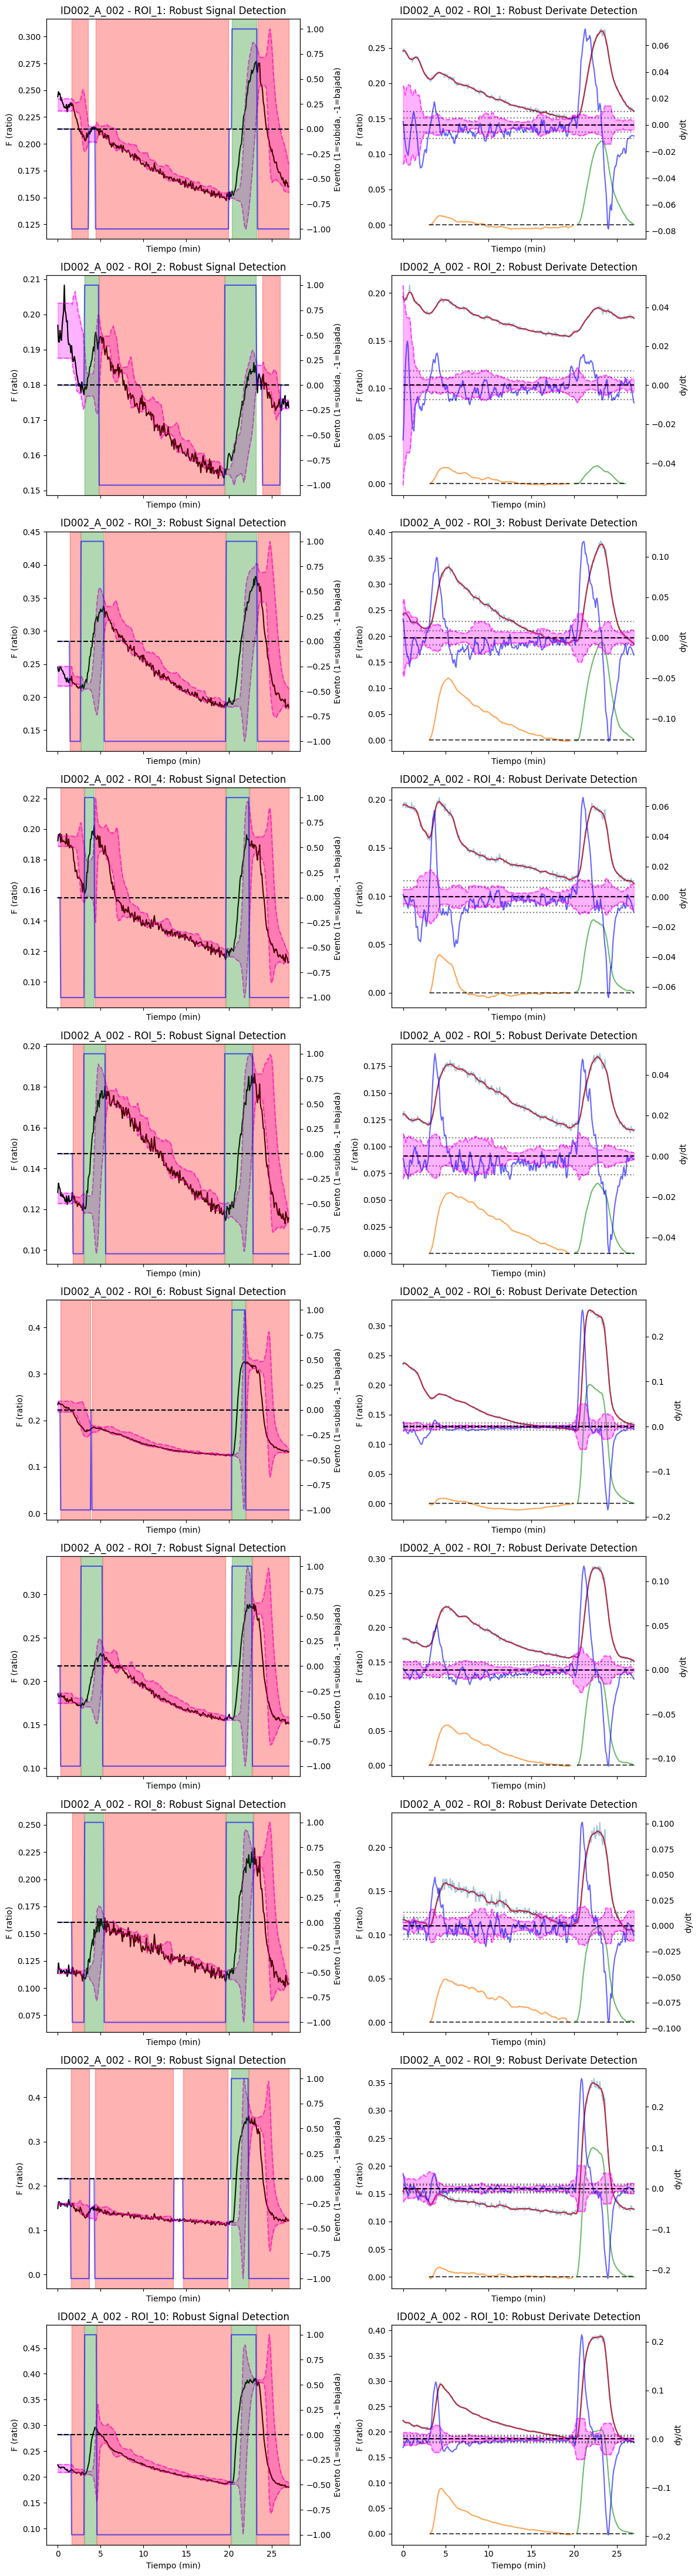

       ROI    Stimuli      Start        End   Duration      Area  Area_1min  \
0    ROI_1  DEPOSITOS   3.057303  19.957397  16.900093 -0.004273   0.003019   
1    ROI_1       SOCE  20.382022  27.006178   6.624157  0.355000   0.010455   
2    ROI_2  DEPOSITOS   3.142228  19.447845  16.305617  0.073103   0.003736   
3    ROI_2       SOCE  20.042322  25.987077   5.944755  0.052333   0.000721   
4    ROI_3  DEPOSITOS   3.057303  19.617695  16.560392  0.695782   0.018410   
5    ROI_3       SOCE  20.042322  27.006178   6.963857  0.560774   0.004784   
6    ROI_4  DEPOSITOS   3.142228  19.617695  16.475467  0.071883   0.015068   
7    ROI_4       SOCE  20.042322  27.006178   6.963857  0.226443   0.004057   
8    ROI_5  DEPOSITOS   3.057303  19.447845  16.390542  0.456795   0.009339   
9    ROI_5       SOCE  20.042322  27.006178   6.963857  0.198073   0.003789   
10   ROI_6  DEPOSITOS   3.057303  19.957397  16.900093 -0.060295  -0.000082   
11   ROI_6       SOCE  20.382022  27.006178   6.6241

In [36]:
# --- FUNCIONES ---

###########################################################################################
########################## Tendencia de la señal (baseline) ###############################
###########################################################################################
def baseline_estimated(x, w = 300, poly = 3, deg = 2):
    """
    Estimación de la línea base mediante ajuste por mínimos cuadrados con un polinomio de grado 3 y suavizado con filtro de Savitzky-Golay.
    El parámetro w es la ventana para el filtro de Savitzky-Golay, que debe ser un número impar. Se recomienda ajustar w según la 
    frecuencia de muestreo y la duración de los eventos que se quieren detectar. Por ejemplo, si se muestrea a 1 Hz y se quieren detectar 
    eventos que duran al menos 30 segundos, se podría usar w = 31 para que el filtro capture la tendencia a largo plazo sin eliminar las 
    fluctuaciones relevantes. Sin embargo, es importante probar diferentes valores de w para encontrar el que mejor se adapte a los datos 
    y al objetivo del análisis.
    """
    x_sg = signal.savgol_filter(x, window_length = w, polyorder = poly)
    ajuste = np.polyfit(np.arange(len(x_sg)), x_sg, deg=deg) # Ajuste polinomial de grado 2 a la señal suavizada
    baseline = np.polyval(ajuste, np.arange(len(x_sg)))# Evaluar el polinomio ajustado para obtener la línea base estimada
    return baseline




###########################################################################################
############################## Robust Detecting Signal ####################################
###########################################################################################
def rolling_mad_sigma(x, w):
    """
    sigma local robusto via MAD deslizante:
    sigma ~ std si x es aproximadamente normal.
    """
    s = pd.Series(x)
    med = s.rolling(w, center=True, min_periods=max(5, w//3)).median()
    mad = (s - med).abs().rolling(w, center=True, min_periods=max(5, w//3)).median()
    sigma = (mad / 0.6745).to_numpy(copy=True)  # Convertir a numpy para manipulación directa
    # sigma = np.array(mad / 0.6745, dtype=float, copy=True)
    sigma[np.isnan(sigma)] = np.nanmedian(sigma)
    return np.maximum(sigma, 1e-12)

def robust_detecting_signal(
        x, 
        t, 
        w = 20, 
        k_up = 1.65, 
        k_down = 3.29,
        influence = 0.95,
        smooth = True,
        w_sg = 15,
        pol_sg = 3,
        robust = True,
        run_min = 2,
        adyacent_post_points = 5,
        adyacent_pre_points = 2
        ):
    """
    Detecta subidas y bajadas en una señal de calcio usando un método robusto basado en la derivada y umbrales adaptativos.
    """

    # --- 1) Suavizado (opcional pero recomendado) ---
    if smooth:
        x_sg = signal.savgol_filter(x, window_length = w_sg, polyorder = pol_sg)
    else:
        x_sg = x.copy()

    # --- arrays para almacenar resultados ---
    N = len(x)
    mask_signal = np.zeros(N)  # 1 para subida, -1 para bajada, 0 para sin evento
    x_filtered = x_sg.copy()[:w]  # señal filtrada que se irá ajustando para detectar eventos
    prom_filtered_array = np.zeros(N)  # array para almacenar el promedio móvil de la señal filtrada
    desv_filtered_array = np.zeros(N)  # array para almacenar la desviación estándar móvil de la señal filtrada
    x_filtered_array = np.zeros(N)  # array para almacenar la señal filtrada en cada paso
    x_filtered_array[:w] = x_filtered  # almacenar los primeros valores de la señal filtrada
    if robust:
        prom_filtered = np.nanmedian(x_filtered)  # promedio móvil de la señal filtrada
        desv_filtered = np.nanmedian(np.abs(x_filtered - prom_filtered)) / 0.6745  # desviación estándar móvil de la señal filtrada
    else:
        prom_filtered = np.nanmean(x_filtered)
        desv_filtered = np.nanstd(x_filtered)
    prom_filtered_array[:w] = prom_filtered
    desv_filtered_array[:w] = desv_filtered
    # --- 2) Detección robusta con histéresis ---
    for i in range(w, N):
        diference = x_sg[i] - prom_filtered
        #if (diference > k_up * desv_filtered and diference > 0) or  (x_sg[i] - x_filtered[-1] > 0 and mask_signal[i-1] == 1):
        if (diference > k_up * desv_filtered and diference > 0) or  (diference > 0 and mask_signal[i-1] == 1):
            mask_signal[i] = 1  # evento de subida
            # Actualizar señal filtrada con influencia del nuevo valor
            x_filtered = np.append(x_filtered, influence * x_sg[i] + (1 - influence) * x_filtered[-1])
            #x_filtered = np.append(x_filtered, prom_filtered + k_up * desv_filtered)  # actualizar la señal filtrada al umbral de subida para evitar que se dispare por ruido
        elif (diference < -k_down * desv_filtered and diference < 0) or (diference < 0 and mask_signal[i-1] == -1):
        #elif (diference < -k_down * desv_filtered and diference < 0) or (x_sg[i] - x_filtered[-1] < 0 and mask_signal[i-1] == -1):
            mask_signal[i] = -1  # evento de bajada
            # Actualizar señal filtrada con influencia del nuevo valor
            x_filtered = np.append(x_filtered, influence * x_sg[i] + (1 - influence) * x_filtered[-1])
            #x_filtered = np.append(x_filtered, prom_filtered - k_down * desv_filtered)  # actualizar la señal filtrada al umbral de bajada para evitar que se dispare por ruido
        else:
            mask_signal[i] = 0  # sin evento
             # Actualizar señal filtrada con influencia del nuevo valor
            x_filtered = np.append(x_filtered, x_sg[i])    
        x_filtered_array[i] = x_filtered[-1]

        # Unir eventos cercanos
        if i > w + run_min:
            if mask_signal[i] == 1 and np.sum(mask_signal[i-run_min:i - 1] == 1) > 0.8 * run_min:
                mask_signal[i-run_min:i] = 1
            elif mask_signal[i] == -1 and np.sum(mask_signal[i-run_min:i - 1] == -1) > 0.8 * run_min:
                mask_signal[i-run_min:i] = -1   
                
        
        # Actualizar promedio y desviación móvil      
        x_filtered = x_filtered[-w:] # mantener solo los últimos w elementos para el cálculo del promedio y desviación
        if robust:
            prom_filtered = np.nanmedian(x_filtered)
            # MAD
            # Calcular MAD (Median Absolute Deviation)
            mad = np.nanmedian(np.abs(x_filtered - prom_filtered))
            desv_filtered = 1.4826 * mad  # Factor de escala para convertir MAD a desviación estándar
        else:
            prom_filtered = np.nanmean(x_filtered)
            desv_filtered = np.nanstd(x_filtered)
        # almacenar el promedio y desviación móvil actualizados
        prom_filtered_array[i] = prom_filtered
        desv_filtered_array[i] = desv_filtered
        
    
    # ¿El valor anterior al comienzo de la subida (bajada) es menor (mayor) que el valor de la subida (bajada)? 
    # Si es así, marcarlo como subida (bajada)


    puntos_previos = 5
    while True:
        cambios = False         # Punto de control para evaluar si se hicieron cambios en esta iteración
        for i in range(1, len(mask_signal) - 1):
            if mask_signal[i] == 1 and (np.sum(x_sg[i - puntos_previos:i] <= x_sg[i]) >= 0.8 * puntos_previos):
                if mask_signal[i-1] != 1:
                    mask_signal[i-1] = 1
                    cambios = True
            elif mask_signal[i] == -1 and (np.sum(x_sg[i - puntos_previos:i] >= x_sg[i]) >= 0.8 * puntos_previos):
                if mask_signal[i-1] != -1:
                    mask_signal[i-1] = -1
                    cambios = True
        if not cambios:
            break
    """
    while True:
        cambios = False         # Punto de control para evaluar si se hicieron cambios en esta iteración
        for i in range(1, len(mask_signal) - 1):
            if mask_signal[i] == 1 and (np.any(x_sg[i - 2:i] <= x_sg[i])):
                if mask_signal[i-1] != 1:
                    mask_signal[i-1] = 1
                    cambios = True
            elif mask_signal[i] == -1 and (np.any(x_sg[i - 2:i] >= x_sg[i])):
                if mask_signal[i-1] != -1:
                    mask_signal[i-1] = -1
                    cambios = True
        if not cambios:
            break
    """

    for i in range(adyacent_pre_points, len(mask_signal) - adyacent_post_points - 1):
        if mask_signal[i] == 0 and np.any(mask_signal[i-adyacent_pre_points:i] == 1) and np.any(mask_signal[i+1:i+1+adyacent_post_points] == 1):
            mask_signal[i] = 1
        elif mask_signal[i] == 0 and np.any(mask_signal[i-adyacent_pre_points:i] == -1) and np.any(mask_signal[i+1:i+1+adyacent_post_points] == -1):
            mask_signal[i] = -1
    return mask_signal, prom_filtered_array, desv_filtered_array, x_filtered_array

###########################################################################################
#################### Función detección robusta señal con derivadas ########################
###########################################################################################
def robust_detecting_signal_derivative_v1(
        x, 
        t, 
        w = 20,
        k_up_on = 1.65,
        k_up_off = 1.65,
        k_down_on = 1.65,
        k_down_off = 1.65,
        smooth = True,
        w_sg = 15,
        pol_sg = 3,
        robust = True
        ):

    """Detecta subidas y bajadas en una señal de calcio usando un método robusto basado en la derivada y umbrales adaptativos.
    """
    # --- 1) Suavizado (opcional pero recomendado) ---
    if smooth:
        x_sg = signal.savgol_filter(x, window_length = w_sg, polyorder = pol_sg)
    else:
        x_sg = x.copy()

    dy = np.gradient(x_sg, t)
    # --- 1) sigma robusto LOCAL (no global) ---
    if robust:
        sigma_local = rolling_mad_sigma(dy, w=w)
    else:
        sigma_local = np.rolling(dy, w=w, center=True).std().to_numpy(copy=True)

    # --- Umbrales con histéresis ---
    up_on  =  k_up_on  * sigma_local
    up_off =  k_up_off * sigma_local
    dn_on  = -k_down_on  * sigma_local
    dn_off = -k_down_off * sigma_local

    # --- 2) Histéresis (estado) para construir máscara estable ---
    up_strong = dy > up_on # True si la señal supera el umbral de subida fuerte
    up_weak   = dy > up_off # True si la señal supera el umbral de subida débil (LOD)

    dn_strong = dy < dn_on # True si la señal supera el umbral de bajada fuerte
    dn_weak   = dy < dn_off # True si la señal supera el umbral de bajada débil (LOD)

    # --- Distribución de la derivada para evaluar la presencia de eventos ---
    distr_dy = np.histogram(dy, bins=100, density=True)
    # --- Distribución de la señal para evaluar la presencia de eventos ---
    distr_dg = np.histogram(x_sg, bins=100, density=True)

    return dy, up_on, up_off, dn_on, dn_off, distr_dy, distr_dg




# --- Subplots ---
fig, axes = plt.subplots(
    math.ceil((len(data.columns)) - 1),
    2,
    figsize=(12, 4 * math.ceil((len(data.columns)))),
    sharex=True,
    sharey=False
)
# Diccionarios para almacenar resultados de todos los ROIs
start_p_dict_total = {}    # Diccionario para almacenar los índices de inicio de eventos de subida para cada ROI
end_p_dict_total = {}      # Diccionario para almacenar los índices de fin de eventos de subida para cada ROI
start_n_dict_total = {}    # Diccionario para almacenar los índices de inicio de eventos de bajada para cada ROI
end_n_dict_total =  {}     # Diccionario para almacenar los índices de fin de eventos de bajada para cada ROI

# Data frame para almacenar los resultados para cada ROI
results_df = pd.DataFrame(columns=['ROI', 'Stimuli', 'Start', 'End', 'Duration', 'Area', 'Area_1min', 'Max'])

for idx, columns in enumerate(data.columns[1:]):
    # Señal
    x = data[columns].to_numpy()
    x_sg = data_sg[columns].to_numpy()
    # Máscara de eventos de subida y bajada usando el método robusto de la señal original
    mask_signal_up, prom_filtered_up, desv_filtered_up, x_filtered_up = robust_detecting_signal(
        x, 
        t, 
        w = 20, 
        k_up = 1.65,
        k_down = 1.65, 
        influence = 0.95,
        smooth = True,
        w_sg = 15,
        pol_sg = 3,
        robust = True,
        run_min = 10)
    mask_signal_down, prom_filtered_down, desv_filtered_down, x_filtered_down = robust_detecting_signal(
        x, 
        t, 
        w = 20, 
        k_up = 3.29,
        k_down = 1.65, 
        influence = 0.95,
        smooth = True,
        w_sg = 15,
        pol_sg = 3,
        robust = True,
        run_min = 10)
    mask_signal = np.zeros_like(mask_signal_up)
    mask_signal[mask_signal_up == 1] = 1
    mask_signal[mask_signal_down == -1] = -1

    # Derivada de la señal suavizada para el método basado en derivadas
    dy, up_on, up_off, dn_on, dn_off, distr_dy, distr_dg = robust_detecting_signal_derivative_v1(
        x, 
        t, 
        w = 20,
        k_up_on = 1.65,
        k_up_off = 1.65,
        k_down_on = 1.65,
        k_down_off = 1.65,
        smooth = True,
        w_sg = 15,
        pol_sg = 3,
        robust = True
        )
       
    # Baseline local robusta usando el percentil 10 móvil para el método basado en derivadas
    # baseline = baseline_estimated(x, w=101, poly=3, deg=1)
     

    # --- Gráficos ---
    # Señal y detección robusta de la señal
    ax = axes[idx, 0] 
    # ax.plot(t, x_sg, label="Suavizada", color="red")
    ax.plot(t, data[columns].to_numpy(), alpha=1, color = "black", label="Original")
    # ax.plot(t, x_filtered_up, label="Señal filtrada", color="brown", alpha=1)
    # Colorear el interior de los umbrales
    # ax.fill_between(t, prom_filtered_up, prom_filtered_up + 1.65 * desv_filtered_up, where=(x_sg > prom_filtered_up + 1.65 * desv_filtered_up), color='magenta', alpha=0.3, label="Zona de subida")
    # ax.fill_between(t, prom_filtered_down - 1.65 * desv_filtered_down, prom_filtered_down, where=(x_sg < prom_filtered_down - 1.65 * desv_filtered_down), color='magenta', alpha=0.3, label="Zona de bajada")
    ax.fill_between(
        t, 
        prom_filtered_down - 1.65 * desv_filtered_down, 
        prom_filtered_up + 1.65 * desv_filtered_up, 
        # where=(x_sg > prom_filtered_up + 1.65 * desv_filtered_up), # Condición para colorear solo cuando la señal supera el umbral de subida
        color='magenta', 
        alpha=0.3
        )
    # ax.fill_between(t, prom_filtered_down - 1.65 * desv_filtered_down, prom_filtered_down, color='magenta', alpha=0.3, label="Zona de bajada")
    ax.plot(t, prom_filtered_up + desv_filtered_up * 1.65, label="Promedio móvil subida + desv", color="magenta", alpha=0.6, linestyle='dashed')
    ax.plot(t, prom_filtered_down - desv_filtered_down * 1.65, label="Promedio móvil bajada - desv", color="magenta", alpha=0.6, linestyle='dashed')
    # ax.set_ylim(-0.1, 1)

    # máscara en segundo eje para no mezclar escalas (opcional pero recomendable)
    ax2 = ax.twinx()
    ax2.plot(t, mask_signal, label="Señal de eventos", color="blue", alpha=0.6)
    ax2.hlines(0, t[0], t[-1], colors='black', linestyles='dashed', alpha=1)


    # Añadir bandas entre dos unos consecutivos en la máscara de eventos
    eventos_p = mask_signal > 0  # True donde hay evento de subida
    eventos_n = mask_signal < 0  # True donde hay evento de bajada

    start_p = None
    start_n = None

    start_p_array = []           # para almacenar los índices de inicio de eventos de subida
    end_p_array = []             # para almacenar los índices de fin de eventos de subida
    start_n_array = []           # para almacenar los índices de inicio de eventos de bajada
    end_n_array = []             # para almacenar los índices de fin de eventos de bajada

    for i in range(1, len(mask_signal)):
        # Para eventos de subida (mask_signal == 1)
        if eventos_p[i] != 0 and not eventos_p[i-1]:  # Inicio de un evento
            start_p = i        
            start_p_array.append(t[start_p])  # Almacenar el tiempo de inicio del evento
        if eventos_p[i] == 0 and eventos_p[i-1]:  # Fin de un evento
            end = i
            end_p_array.append(t[end])  # Almacenar el tiempo de fin del evento
            ax2.axvspan(t[start_p], t[end-1], alpha=0.30, color="green")  # Sombrear el área del evento   
        # Para eventos de bajada (mask_signal == -1)
        if eventos_n[i] != 0 and eventos_n[i-1] == 0:  # Inicio de un evento
            start_n = i   
            start_n_array.append(t[start_n])
        if eventos_n[i] == 0 and eventos_n[i-1]:  # Fin de un evento
            end = i 
            end_n_array.append(t[end])
            ax2.axvspan(t[start_n], t[end-1], alpha=0.30, color="red")  # Sombrear el área del evento
        if i == len(mask_signal) - 1:  # Si el último punto es un evento, cerrarlo hasta el final
            if eventos_p[i]:
                end_p_array.append(t[i])
                ax2.axvspan(t[start_p], t[i], alpha=0.30, color="green")
            if eventos_n[i]:
                end_n_array.append(t[i])
                ax2.axvspan(t[start_n], t[i], alpha=0.30, color="red")
    # Guardar los índices de inicio y fin de eventos para este ROI en el diccionario total
    start_p_dict_total[columns] = start_p_array
    end_p_dict_total[columns] = end_p_array
    start_n_dict_total[columns] = start_n_array
    end_n_dict_total[columns] = end_n_array

    ax.set_title(f"{carpetas[exper]} - {columns}: Robust Signal Detection")
    ax.set_xlabel("Tiempo (min)")
    ax.set_ylabel("F (ratio)")
    ax2.set_ylabel("Evento (1=subida, -1=bajada)")

    # Gráfico de la derivada y umbrales
    ax = axes[idx, 1]
    ax.plot(t, x_sg, label="Suavizada", color="red")
    ax.plot(t, data[columns].to_numpy(), alpha=0.4, label="Original")

    # máscara en segundo eje para no mezclar escalas (opcional pero recomendable)
    ax2 = ax.twinx()
    ax2.plot(t, dy, label="Derivada filtrada", color="blue", alpha=0.6)
    # Colorear el interior de los umbrales
    ax2.fill_between(t, up_on, color='magenta', alpha=0.3, label="Zona de subida")
    ax2.fill_between(t, dn_on, color='magenta', alpha=0.3, label="Zona de bajada")
    ax2.plot(t, up_on, label="Umbral Subida adaptativo", color="magenta", alpha=0.6, linestyle='dashed')
    ax2.plot(t, dn_on, label="Umbral Bajada adaptativo", color="magenta", alpha=0.6, linestyle='dashed')
    ax2.hlines(y=0, xmin=t[0], xmax=t[-1], colors='black', linestyles='dashed', alpha=1)

    # mad de la derivada de la señal suavizada para el método basado en derivadas
    dy_median = np.nanmedian(dy)
    dy_mad_corr = np.nanmedian(np.abs(dy - dy_median)) / 0.6745
    ax2.hlines(y=dy_mad_corr * 1.65, xmin=t[0], xmax=t[-1], color='black', alpha=0.5, linestyle='dotted', label="MAD de la derivada")
    ax2.hlines(y=-dy_mad_corr * 1.65, xmin=t[0], xmax=t[-1], color='black', alpha=0.5, linestyle='dotted', label="MAD de la derivada")
    ax2.hlines(y=np.nanmedian(up_on), xmin=t[0], xmax=t[-1], color='black', alpha=0.5, linestyle='dotted', label="MAD de la derivada")
    ax2.hlines(y=np.nanmedian(dn_on), xmin=t[0], xmax=t[-1], color='black', alpha=0.5, linestyle='dotted', label="MAD de la derivada")

    ax.set_title(f"{carpetas[exper]} - {columns}: Robust Derivate Detection")
    ax.set_xlabel("Tiempo (min)")
    ax.set_ylabel("F (ratio)")
    ax2.set_ylabel("dy/dt")

    # Separar gráficos con un espacio horizontal
    fig.tight_layout() # Ajustar el diseño para evitar solapamientos

    # Calcular el área bajo la curva de la señal suavizada dentro de cada estímulo (archivo estimulos.csv)
    # tal que, el inicio será el primer evento de suvida que ocurra después del inicio del estímulo, y el fin será 
    # el último evento de bajada antes de que ocurra el siguiente estímulo. 
    # además, como baseline se trazará una recta que irá desde el valor de la señal suavizada en el inicio del estímulo
    # según la máscara de eventos, hasta el valor de la señal suavizada en el final del úlimo evento de bajada antes del siguiente estímulo.
    for index, row in data_csv.iterrows():
        start_time = row['inicio'] # Inicio del intervalo del estímulo según el archivo de estímulos
        # Encontrar el final del estímulo como el inicio del siguiente estímulo, o el final de la señal si es el último estímulo
        if index < len(data_csv) - 1: # Si no es el último estímulo, el final del estímulo es el inicio del siguiente estímulo
            end_time = data_csv.iloc[index + 1]['inicio'] # Inicio del siguiente estímulo
        else:
            end_time = t[-1] # Final de la señal si es el último estímulo      
        estimulo = row.iloc[0]     # Nombre del estímulo
        print(f"Procesando {estimulo} en {columns} entre {start_time} y {end_time}...")

        # Encontrar el primer evento de subida después del inicio del estímulo
        start_event_idx = np.where((t >= start_time) & (t <= end_time) & (mask_signal == 1))[0] # Primer evento de subida después del inicio del estímulo
        if len(start_event_idx) > 0:
            start_event_idx = start_event_idx[0]  # Primer evento de subida
        else:
            start_event_idx = np.where(t >= start_time)[0][0]
        start_time = t[start_event_idx]  # Actualizar el inicio del estímulo al tiempo del primer evento de subida

        # Encontrar el último evento de bajada antes del siguiente estímulo
        end_event_idx_array = np.where((t <= end_time) & (mask_signal == -1))[0]  # Último evento de bajada antes del final del estímulo
        if len(end_event_idx_array) > 0:
            end_event_idx = end_event_idx_array[-1]  # Último evento de bajada
        else:
            end_event_idx = np.where(t <= end_time)[0][-1]  # Último índice antes del final del estímulo
        
        # Validar que end_event_idx sea mayor que start_event_idx
        if end_event_idx <= start_event_idx:
            print(f"Advertencia: end_event_idx ({end_event_idx}) <= start_event_idx ({start_event_idx}) para {estimulo} en {columns}. Saltando...")
            continue
        
        end_time = t[end_event_idx]  # Actualizar el final del estímulo al tiempo del último evento de bajada

        """
        # Encontrar el último evento de bajada antes del siguiente estímulo
        end_event_idx_array = np.where((t <= end_time) & (mask_signal == -1))[0]  # Último evento de bajada antes del final del estímulo
        if len(end_event_idx_array) > 0:
            end_event_idx = end_event_idx_array[-1]  # Último evento de bajada
        else:
            end_event_idx = np.where(t <= end_time)[0][-1]  # Último índice antes del final del estímulo
        
        # Validar que end_event_idx sea mayor que start_event_idx
        if end_event_idx <= start_event_idx:
            print(f"Advertencia: end_event_idx ({end_event_idx}) <= start_event_idx ({start_event_idx}) para {estimulo} en {columns}. Saltando...")
            continue
        
        end_time = t[end_event_idx]  # Actualizar el final del estímulo al tiempo del último evento de bajada
        """
        # Calcular el área bajo la curva original entre el primer evento de subida y el último evento de bajada
        print(f"Calculando área para {estimulo} en {columns} entre {t[start_event_idx]} y {t[end_event_idx]}...")
        
        x_baseline = np.linspace(x_sg[start_event_idx], x_sg[end_event_idx], end_event_idx - start_event_idx + 1)  # Línea base entre el inicio y el fin del evento
        x_corrected = x_sg[start_event_idx:end_event_idx+1] - x_baseline  # Señal corregida restando la línea base

        """
        # Ajustar el final al punto donce x_corrected se vuelve negativa por primera vez después del inicio del evento
        negative_after_start = np.where(x_corrected < 0)[0]  # Índices donde la señal corregida es negativa
        if len(negative_after_start) > 0:
            first_negative_idx = negative_after_start[0]  # Primer índice donde la señal corregida es negativa
            end_event_idx = start_event_idx + first_negative_idx  # Actualizar el índice de fin del evento al primer punto donde la señal corregida se vuelve negativa
            end_time = t[end_event_idx]  # Actualizar el tiempo de fin del evento
            x_corrected = x_sg[start_event_idx:end_event_idx+1] - x_baseline[:first_negative_idx+1]  # Actualizar la señal corregida para el nuevo intervalo del evento
        """
        # Graficar la señal original y la señal corregida para este estímulo
        ax.plot(t[start_event_idx:end_event_idx+1], x_corrected, label=f"{estimulo} corregida", alpha=0.7)  # Graficar la señal corregida para este estímulo
        ax.hlines(0, t[start_event_idx], t[end_event_idx], colors='black', linestyles='dashed', alpha=0.7)  # Línea base corregida
        # Evaluar area si 
        area = trapezoid(x_corrected, t[start_event_idx:end_event_idx+1])
        puntos_1_min = int(1 / (t[1] - t[0]))  # Como t está en minutos, esto calcula el número de puntos que corresponden a 1 minuto
        area_1 = trapezoid(
            x_corrected[:puntos_1_min], 
            t[start_event_idx:start_event_idx + puntos_1_min])  # Área bajo la curva para el primer minuto del evento
        
        # Máximo
        max_val = np.max(x_corrected)
        print(f"Área bajo la curva para {estimulo} en {columns}: {area}, Máximo: {max_val}")

        # Almacenar los resultados en el DataFrame
        new_row = pd.DataFrame({
            'ROI': [columns],
            'Stimuli': [estimulo],
            'Start': [t[start_event_idx]],
            'End': [t[end_event_idx]],
            'Duration': [t[end_event_idx] - t[start_event_idx]],
            'Area': [area],
            'Area_1min': [area_1],  
            'Max': [max_val]
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)
        
plt.show()
print(results_df)

